In [1]:
# import functools
# import os
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  img = tf.io.decode_image(
      tf.io.read_file(image_url),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

content_image_url = './Exp-4/animals.jpg' 
style_image_url = './Exp-4/horses.jpg'  
output_image_size = 1080 
content_img_size = (output_image_size, output_image_size)
style_img_size = (512,512)
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

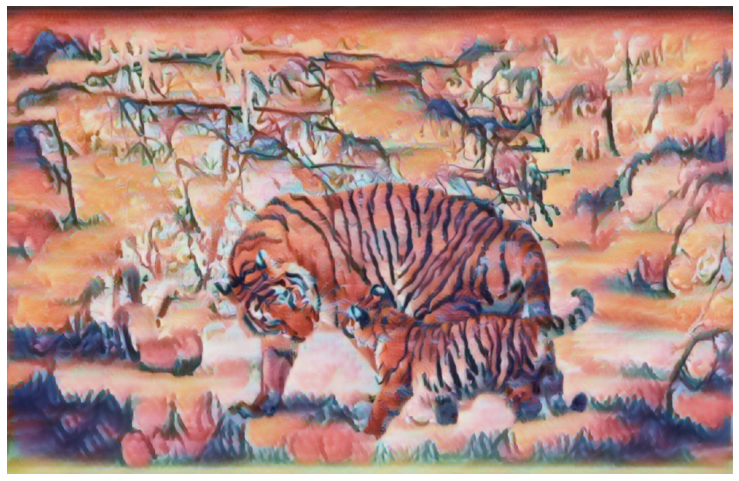

In [3]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]



outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  save_path = 'stylized_image.jpg'
  plt.savefig(save_path, dpi=300)
  plt.show()

show_n([stylized_image], titles=[''])